In [1]:
import xarray as xr 
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
import metpy.calc as mycalc

In [2]:
RV=xr.open_dataset('./RV850_temp.nc')['vo']
RV

<xarray.DataArray 'vo' (time: 120, latitude: 37, longitude: 37)>
[164280 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 109.0 109.2 109.5 109.8 ... 117.5 117.8 118.0
  * latitude   (latitude) float32 26.0 25.75 25.5 25.25 ... 17.5 17.25 17.0
    level      int32 ...
  * time       (time) datetime64[ns] 2018-09-01 ... 2018-09-30T18:00:00
Attributes:
    units:          s**-1
    long_name:      Vorticity (relative)
    standard_name:  atmosphere_relative_vorticity

In [3]:
SP=xr.open_dataset('./SP_temp.nc')['sp']
SP

<xarray.DataArray 'sp' (time: 120, expver: 2, latitude: 37, longitude: 37)>
[328560 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 109.0 109.2 109.5 109.8 ... 117.5 117.8 118.0
  * latitude   (latitude) float32 26.0 25.75 25.5 25.25 ... 17.5 17.25 17.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 2018-09-01 ... 2018-09-30T18:00:00
Attributes:
    units:          Pa
    long_name:      Surface pressure
    standard_name:  surface_air_pressure

In [4]:
u10=xr.open_dataset('./u10_temp.nc')['u10']
v10=xr.open_dataset('./v10_temp.nc')['v10']
u10

<xarray.DataArray 'u10' (time: 120, expver: 2, latitude: 37, longitude: 37)>
[328560 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 109.0 109.2 109.5 109.8 ... 117.5 117.8 118.0
  * latitude   (latitude) float32 26.0 25.75 25.5 25.25 ... 17.5 17.25 17.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 2018-09-01 ... 2018-09-30T18:00:00
Attributes:
    units:      m s**-1
    long_name:  10 metre U wind component

In [5]:
np.sqrt(u10.loc['2018-09-16T06',1,:,:]**2+v10.loc['2018-09-16T06',1,:,:]**2).max()

<xarray.DataArray ()>
array(29.503918, dtype=float32)
Coordinates:
    expver   int32 1
    time     datetime64[ns] 2018-09-16T06:00:00

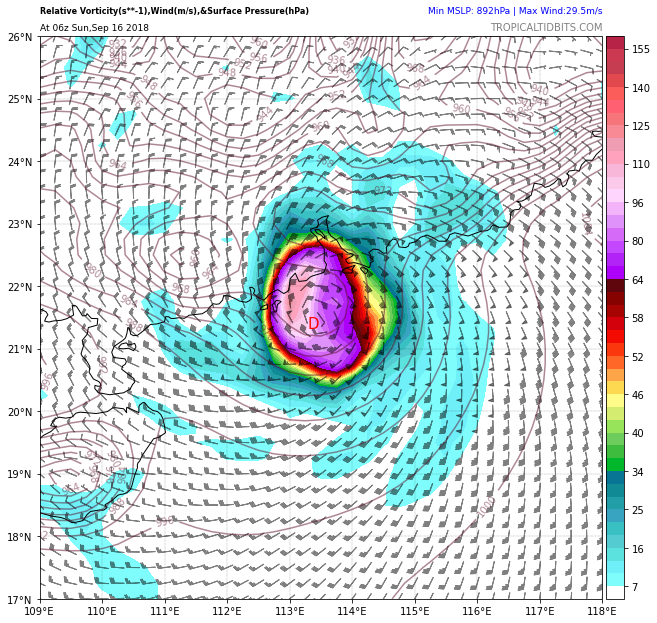

In [14]:
lat=u10.latitude
lon=u10.longitude
box1=[109,118,17,26]
fig = plt.figure(figsize=(10, 10))
ax = fig.subplots(1, 1, subplot_kw={'projection': ccrs.PlateCarree(central_longitude=113.5)})
ax.coastlines('50m')
ax.set_extent(box1,crs=ccrs.PlateCarree())

# 标注坐标轴
ax.set_xticks(np.arange(box1[0], box1[1] + 1, 1), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(box1[2], box1[3] + 1, 1), crs=ccrs.PlateCarree())

# 经纬度格式，把0经度设置不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.gridlines(xlocs=np.arange(box1[0], box1[1] + 1, 1), ylocs=np.arange(box1[2], box1[3] + 1, 1), linestyle=':', linewidth=0.3, x_inline=False, y_inline=False, color='k')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# 标题
plt.title('At 06z Sun,Sep 16 2018',loc='left',fontdict={'fontsize':9})
plt.title("TROPICALTIDBITS.COM",loc='right',fontdict={'fontsize':10,'color':'grey'})
plt.suptitle("Relative Vorticity(s**-1),Wind(m/s),&Surface Pressure(hPa)",x=0.06,y=0.918,ha='left',fontsize=8,fontweight='bold')
ax.text(x=1,y=1.04,s="Min MSLP: 892hPa | Max Wind:29.5m/s",ha='right',transform=ax.transAxes,fontsize=9,color='blue')
#标记中心位置
ax.text(113.29, 21.33, 'D', color='r', size=15,transform=ccrs.PlateCarree())  
# 绘制
smoothSP=mycalc.smooth_gaussian(SP.loc['2018-09-16T06',1,:,:]/100,9)
line=ax.contour(lon,lat,smoothSP,levels=np.arange(892,1006,4),colors='#5d122b',transform=ccrs.PlateCarree(),alpha=0.5,)
ax.clabel(line, inline=True, fontsize=10, fmt='%.0f')
levels=[0,7,10,13,16,19,22,25,28,31,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64,69.4,74.7,80,85.4,90.7,96,100,105,110,115,120,125,130,135,140,145,150,155,160]
colors=['#ffffff','#7ffdfc','#6feff8','#5be1de','#54cbd1','#38c0c3','#38a4c1','#219ea6','#108b95','#097595','#00b62a','#3dbc3d','#6dcc5b','#97e359','#d4ed70','#fffc89','#fdd952','#fea549','#ff6728','#fb370d','#f30b01','#d3010c','#a60402','#850201','#5e060b','#ae01fa','#b223f7','#c247fe','#d66af8','#de92fa','#f4b4fa','#fdd5fd','#fbcaea','#f8b7d8','#ffa2be','#ee9db3','#f88a96','#f6757a','#ff6172','#fb5d5b','#e2494e','#c63d51','#cc3a51','#b72347','#981b45']
colorbar=ax.contourf(lon,lat,RV.loc['2018-09-16T06',:,:]*10**5,levels=levels,colors=colors,transform=ccrs.PlateCarree())
cb=plt.colorbar(colorbar,extendrect='True',pad=0.005,fraction=0.15, shrink=0.83,aspect=30,location='right')
cb.set_ticks([7,16,25,34,40,46,52,58,64,80,96,110,125,140,155])
cb.set_ticklabels(('7','16','25','34','40','46','52','58','64','80','96','110','125','140','155'))
lon1,lat1=np.meshgrid(lon,lat)
step=1
ax.barbs(lon1[::step,::step], lat1[::step,::step], u10.loc['2018-09-16T06',1,::step,::step].data, v10.loc['2018-09-16T06',1,::step,::step].data, pivot='middle', length=5, barb_increments=dict(half=2, full=4, flag=20),alpha=0.5,color='black', transform=ccrs.PlateCarree())
plt.tight_layout()
plt.savefig('ty.png')